In [1]:
import sys
sys.path.append('../')
%load_ext autoreload
%autoreload 2
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from astropile.utils import get_catalog, cross_match_datasets
from datasets import load_dataset_builder, load_dataset

In [3]:
hsc_dset = load_dataset_builder('/home/flanusse/AstroPile/hsc', trust_remote_code=True)
desi_dset = load_dataset_builder('/home/flanusse/AstroPile/desi', trust_remote_code=True)

Resolving data files:   0%|          | 0/73 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/375 [00:00<?, ?it/s]

In [4]:
# It's fast and easy to retrieve the catalog of objects for each sample
cat_desi = get_catalog(desi_dset)
cat_hsc = get_catalog(hsc_dset)

In [7]:
# And we can cross-match the two catalogs
dset = cross_match_datasets(desi_dset, hsc_dset, 
                                    matching_radius=1.0, 
                                    num_proc=10,
                                    cache_dir='/home/flanusse/HF_cache')

Initial number of matches:  20530
Number of matches lost at healpix region borders:  3
Final size of cross-matched catalog:  20527


In [11]:
dset = dset.with_format('jax')

In [31]:
example = dset[3]

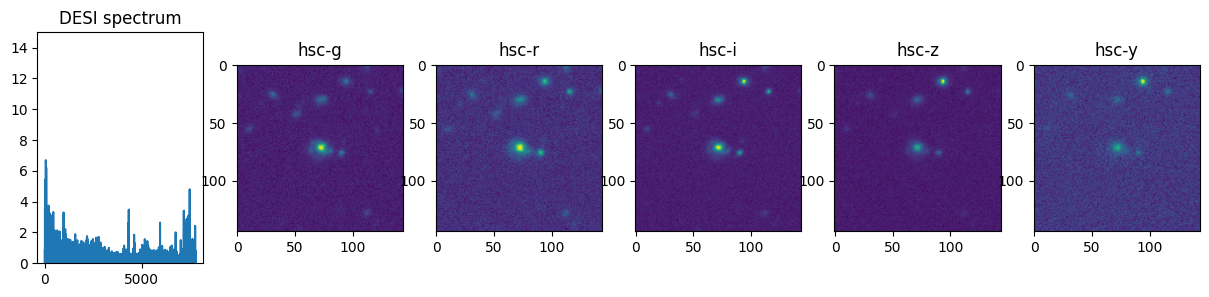

In [32]:
figure(figsize=[15,3])
subplot(1,6,1)
ylim(0,15)
plot(example['spectrum']['flux'])
title('DESI spectrum')
for i in range (5):
    subplot(1,6,i+2)
    imshow(example['image']['array'][i])
    title(example['image']['band'][i])